<a href="https://colab.research.google.com/github/utopickaiser/AI-Homework/blob/main/AI_Homework_W4_Fuzzy_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

<ipython-input-48-3ab39d5b9470>:61: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
<ipython-input-48-3ab39d5b9470>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
<ipython-input-48-3ab39d5b9470>:63: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )


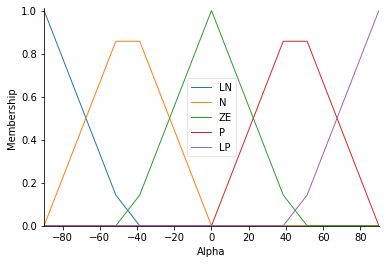

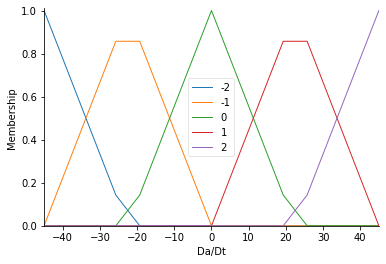

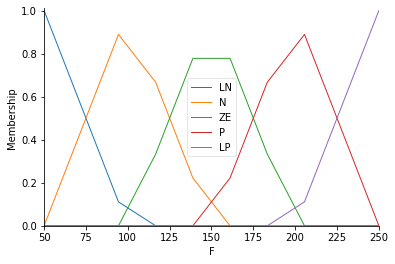

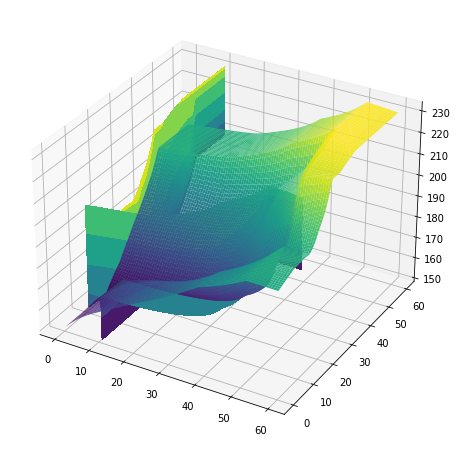

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pi = math.pi
universe = np.linspace(-90,90,15)
universe1 = np.linspace(-45,45,15)
universe2 = np.linspace(50,250,10)
alpha = ctrl.Antecedent(universe, 'Alpha')
dalpha = ctrl.Antecedent(universe1, 'Da/Dt')
F = ctrl.Consequent(universe2,'F')
item1 = ['LN' , 'N', 'ZE', 'P', 'LP']
item2 = ['-2' , '-1', '0', '1', '2']
alpha.automf(names = item1)
dalpha.automf(names = item2)
F.automf(names = item1)
alpha.view()
dalpha.view()
F.view()
rule0 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['-2'])|
                  (alpha['N'] & dalpha['-2'])|(alpha['LN'] & dalpha['-1']),
                   consequent = F['LN'], label = 'Rule LN')
rule1 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['0'])|
                  (alpha['LN'] & dalpha['1'])|
                  (alpha['N'] & dalpha['-1'])|(alpha['N'] & dalpha['0'])
                  |(alpha['ZE'] & dalpha['-2'])|(alpha['ZE'] & dalpha['-1']),
                   consequent = F['N'], label = 'Rule N')
rule2 = ctrl.Rule(antecedent = (alpha['LN'] & dalpha['2'])|
                  (alpha['N'] & dalpha['1'])|
                  (alpha['N'] & dalpha['2'])|(alpha['ZE'] & dalpha['0'])
                  |(alpha['ZE'] & dalpha['1'])|(alpha['P'] & dalpha['-2'])
                  |(alpha['P'] & dalpha['-1'])|(alpha['LP'] & dalpha['-2'])
                  |(alpha['LP'] & dalpha['-1']),
                   consequent = F['ZE'], label = 'Rule ZE')
rule3 = ctrl.Rule(antecedent = (alpha['ZE'] & dalpha['2'])|
                  (alpha['P'] & dalpha['0'])|
                  (alpha['ZE'] & dalpha['2']),
                   consequent = F['P'], label = 'Rule P')
rule4 = ctrl.Rule(antecedent = (alpha['P'] & dalpha['2'])|
                  (alpha['LP'] & dalpha['1'])|
                  (alpha['LP'] & dalpha['2']),
                   consequent = F['LP'], label = 'Rule LP')
system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 91*91+1)
upsampled = np.linspace(0,60,91)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(91):
  for j in range(91):
    for k in range(91):
      sim.input['Alpha'] = x[i,j]
      sim.input['Da/Dt'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['F']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)





<ipython-input-62-71edcc0c3a28>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
<ipython-input-62-71edcc0c3a28>:51: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
<ipython-input-62-71edcc0c3a28>:52: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )


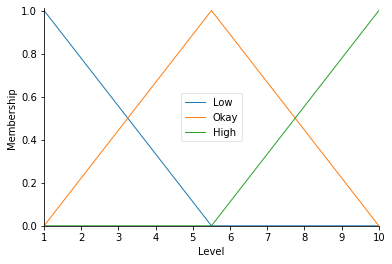

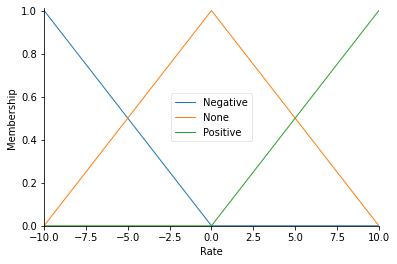

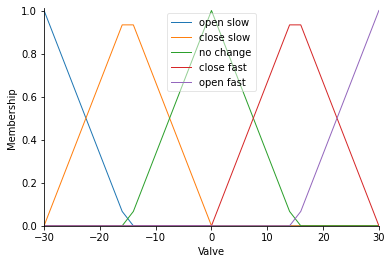

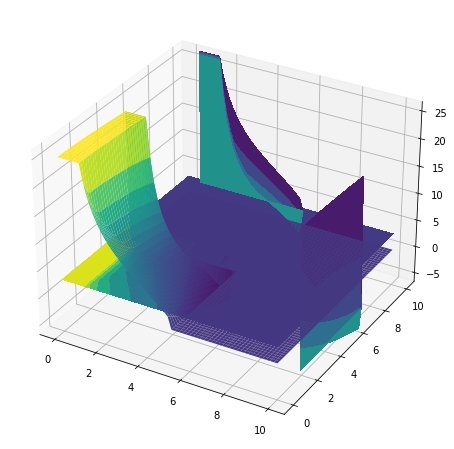

In [62]:
# water level control
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(1,10,31)
universe1 = np.linspace(-10,10,31)
universe2 = np.linspace(-30,30,31)
level = ctrl.Antecedent(universe, 'Level')
rate = ctrl.Antecedent(universe1, 'Rate')
valve = ctrl.Consequent(universe2,'Valve')
item1 = ['Low' , 'Okay', 'High']
item2 = ['Negative' , 'None', 'Positive']
item3 = ['open slow', 'close slow', 'no change', 'close fast', 'open fast']
level.automf(names = item1)
rate.automf(names = item2)
valve.automf(names = item3)
level.view()
rate.view()
valve.view()
rule0 = ctrl.Rule(antecedent = (rate['None'] & level['Okay']),
                   consequent = valve['no change'], label = 'Valve No Change')
rule1 = ctrl.Rule(antecedent = (rate['None'] & level['Low']),
                   consequent = valve['open fast'], label = 'Valve Open Fast')
rule2 = ctrl.Rule(antecedent = (rate['None'] & level['High']),
                   consequent = valve['close fast'], label = 'Valve Close Fast')
rule3 = ctrl.Rule(antecedent = (rate['Positive'] & level['Okay']),
                   consequent = valve['close slow'], label = 'Valve Close Slow')
rule4 = ctrl.Rule(antecedent = (rate['Negative'] & level['Okay']),
                   consequent = valve['open slow'], label = 'Valve Open Slow')

system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(31):
  for j in range(31):
    for k in range(31):
      sim.input['Level'] = x[i,j]
      sim.input['Rate'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['Valve']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)

<ipython-input-48-17dec2458fbf>:57: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
<ipython-input-48-17dec2458fbf>:58: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
<ipython-input-48-17dec2458fbf>:59: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )


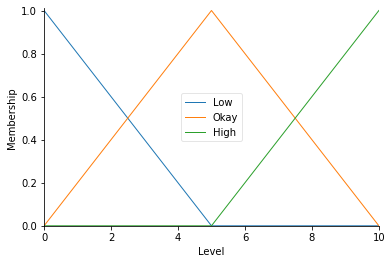

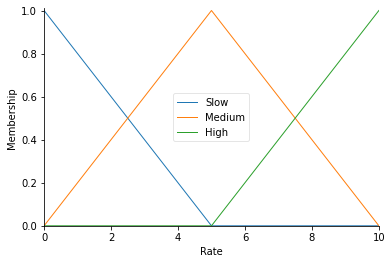

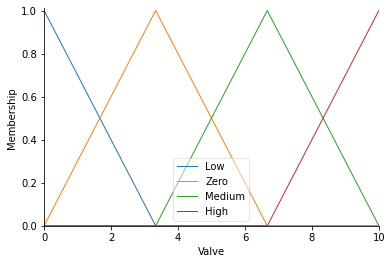

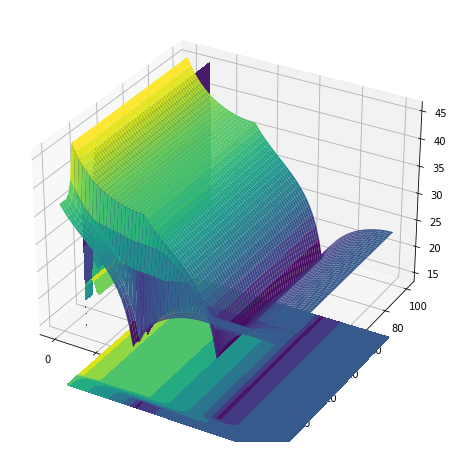

In [48]:
# temperature controller
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(0,100,61)
universe1 = np.linspace(0,10,61)
universe2 = np.linspace(10,50,61)
tempe = ctrl.Antecedent(universe, 'Temperature')
humi = ctrl.Antecedent(universe1, 'Humidity')
fan_spd = ctrl.Consequent(universe2,'Fan Speed')
item1 = ['Cold' , 'Cool' ,'Warm', 'Hot']
item2 = ['Low' , 'Medium', 'High']
item3 = ['Low', 'Zero', 'Medium', 'High']
tempe.automf(names = item1)
humi.automf(names = item2)
fan_spd.automf(names = item3)
level.view()
rate.view()
valve.view()
rule0 = ctrl.Rule(antecedent = (tempe['Warm'] & humi['High']
                                |tempe['Cool'] & humi['Medium']
                                |tempe['Cool'] & humi['Low']),
                   consequent = fan_spd['Low'], label = 'Fan Speed Low')
rule1 = ctrl.Rule(antecedent = (tempe['Hot'] & humi['High']
                                |tempe['Warm'] & humi['Medium']
                                |tempe['Hot'] & humi['Medium']
                                |tempe['Warm'] & humi['Low']
                                |tempe['Hot'] & humi['Low']),
                   consequent = fan_spd['Zero'], label = 'Fan Speed Zero')
rule2 = ctrl.Rule(antecedent = (tempe['Cool'] & humi['High']
                                |tempe['Cold'] & humi['Medium']
                                |tempe['Cold'] & humi['Low']),
                   consequent = fan_spd['Medium'], label = 'Fan Speed Medium')
rule3 = ctrl.Rule(antecedent = (tempe['Cold'] & humi['High']),
                   consequent = fan_spd['High'], label = 'Fan Speed High')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,100,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    for k in range(61):
      sim.input['Temperature'] = x[i,j]
      sim.input['Humidity'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['Fan Speed']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)

In [ ]:
from numpy.core.arrayprint import format_float_scientific
# A Fuzzy vacuum cleaner
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
universe = np.linspace(0,10,61)
universe1 = np.linspace(0,10,61)
universe2 = np.linspace(10,50,61)
surface = ctrl.Antecedent(universe, 'Surface')
da = ctrl.Antecedent(universe1, 'Dust Amount')
force = ctrl.Consequent(universe2,'Force')
item1 = ['Wood' , 'Tatami' ,'Carpet']
item2 = ['Low' , 'Medium', 'High']
item3 = ['Low', 'Zero', 'Medium', 'High']
tempe.automf(names = item1)
humi.automf(names = item2)
fan_spd.automf(names = item3)
level.view()
rate.view()
valve.view()
rule0 = ctrl.Rule(antecedent = (tempe['Warm'] & humi['High']
                                |tempe['Cool'] & humi['Medium']
                                |tempe['Cool'] & humi['Low']),
                   consequent = fan_spd['Low'], label = 'Fan Speed Low')
rule1 = ctrl.Rule(antecedent = (tempe['Hot'] & humi['High']
                                |tempe['Warm'] & humi['Medium']
                                |tempe['Hot'] & humi['Medium']
                                |tempe['Warm'] & humi['Low']
                                |tempe['Hot'] & humi['Low']),
                   consequent = fan_spd['Zero'], label = 'Fan Speed Zero')
rule2 = ctrl.Rule(antecedent = (tempe['Cool'] & humi['High']
                                |tempe['Cold'] & humi['Medium']
                                |tempe['Cold'] & humi['Low']),
                   consequent = fan_spd['Medium'], label = 'Fan Speed Medium')
rule3 = ctrl.Rule(antecedent = (tempe['Cold'] & humi['High']),
                   consequent = fan_spd['High'], label = 'Fan Speed High')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(0,100,61)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(61):
  for j in range(61):
    for k in range(61):
      sim.input['Temperature'] = x[i,j]
      sim.input['Humidity'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['Fan Speed']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)

<ipython-input-128-979f2e96a3a7>:83: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
<ipython-input-128-979f2e96a3a7>:84: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
<ipython-input-128-979f2e96a3a7>:85: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )


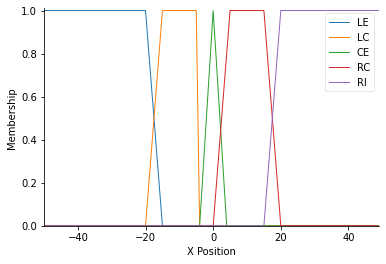

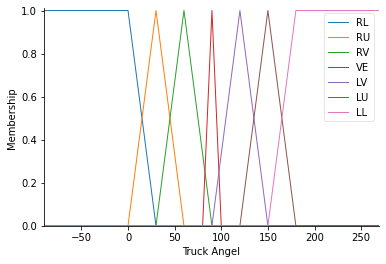

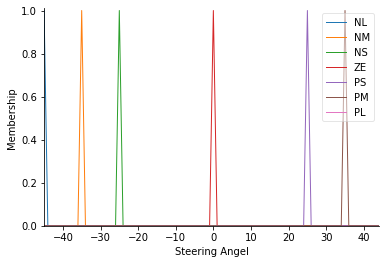

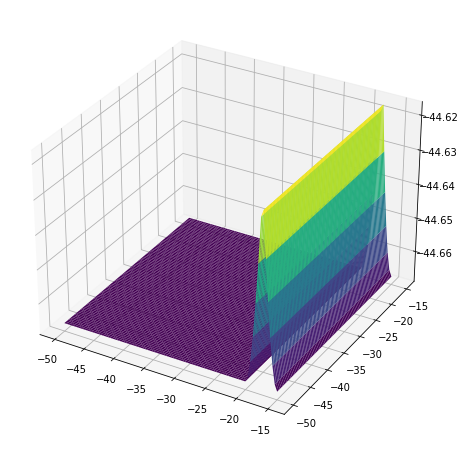

In [128]:
# Mobile Robot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
xpos = ctrl.Antecedent(np.arange(-50,50,1),'X Position')
tr = ctrl.Antecedent(np.arange(-90,270,1),'Truck Angel')
st = ctrl.Consequent(np.arange(-45,45,1),'Steering Angel')
# Thiết lập cách giá trị
xpos['LE'] = fuzz.trapmf(xpos.universe,[-50,-50,-20,-15])
xpos['LC'] = fuzz.trapmf(xpos.universe,[-20,-15,-5,-4])
xpos['CE'] = fuzz.trapmf(xpos.universe,[-4,0,0,4])
xpos['RC'] = fuzz.trapmf(xpos.universe,[0,5,15,20])
xpos['RI'] = fuzz.trapmf(xpos.universe,[15,20,50,50])

tr['RL'] = fuzz.trapmf(tr.universe,[-90,-90,0,30])
tr['RU'] = fuzz.trapmf(tr.universe,[0,30,30,60])
tr['RV'] = fuzz.trapmf(tr.universe,[30,60,60,90])
tr['VE'] = fuzz.trapmf(tr.universe,[80,90,90,100])
tr['LV'] = fuzz.trapmf(tr.universe,[90,120,120,150])
tr['LU'] = fuzz.trapmf(tr.universe,[120,150,150,180])
tr['LL'] = fuzz.trapmf(tr.universe,[150,180,270,270])

st['NL'] = fuzz.trimf(st.universe,[-45,-45,-45])
st['NM'] = fuzz.trimf(st.universe,[-35,-35,-35])
st['NS'] = fuzz.trimf(st.universe,[-25,-25,-25])
st['ZE'] = fuzz.trimf(st.universe,[0,0,0])
st['PS'] = fuzz.trimf(st.universe,[25,25,25])
st['PM'] = fuzz.trimf(st.universe,[35,35,35])
st['PL'] = fuzz.trimf(st.universe,[45,45,45])

xpos.view()
tr.view()
st.view()
rule0 = ctrl.Rule(antecedent = (xpos['LE'] & tr['RL'])|
                  (xpos['LE'] & tr['RU'])|(xpos['LE'] & tr['RV'])|
                  (xpos['LC'] & tr['RL'])|(xpos['LC'] & tr['RU']),
                   consequent = st['NL'], label = 'Rule NL')
rule1 = ctrl.Rule(antecedent = (xpos['LE'] & tr['VE'])|
                  (xpos['LE'] & tr['LV'])|(xpos['LC'] & tr['RV'])|
                  (xpos['LC'] & tr['VE'])|(xpos['CE'] & tr['RL']|
                  (xpos['RC'] & tr['RU'])|(xpos['CE'] & tr['RU'])),
                   consequent = st['NM'], label = 'Rule NM')
rule2 = ctrl.Rule(antecedent = (xpos['LE'] & tr['LU'])|
                  (xpos['LC'] & tr['LV'])|(xpos['CE'] & tr['RV'])|
                  (xpos['RC'] & tr['RU'])|(xpos['RI'] & tr['RL']),
                   consequent = st['NS'], label = 'Rule NS')
rule3 = ctrl.Rule(antecedent = (xpos['CE'] & tr['VE']),
                   consequent = st['ZE'], label = 'Rule ZE')
rule4 = ctrl.Rule(antecedent = (xpos['LE'] & tr['LL'])|
                  (xpos['LC'] & tr['LU'])|(xpos['CE'] & tr['LV'])|
                  (xpos['RC'] & tr['RV'])|(xpos['RI'] & tr['RU']),
                   consequent = st['PS'], label = 'Rule PS')
rule5 = ctrl.Rule(antecedent = (xpos['LC'] & tr['LL'])|
                  (xpos['CE'] & tr['LU'])|(xpos['CE'] & tr['LL'])|
                  (xpos['RC'] & tr['VE'])|(xpos['RC'] & tr['LV']|
                  (xpos['RI'] & tr['RV'])|(xpos['RI'] & tr['VE'])),
                   consequent = st['PM'], label = 'Rule PM')
rule6 = ctrl.Rule(antecedent = (xpos['RC'] & tr['LL'])|
                  (xpos['RC'] & tr['LU'])|(xpos['RI'] & tr['LL'])|
                  (xpos['RI'] & tr['LU'])|(xpos['RI'] & tr['LV']),
                   consequent = st['PL'], label = 'Rule PL')


system = ctrl.ControlSystem(rules = [rule0,rule1,rule2,rule3,rule4,rule5,rule6])
sim = ctrl.ControlSystemSimulation(system, flush_after_run = 91*91+1)
upsampled = np.linspace(-50,-15,91)
x,y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)
for i in range(91):
  for j in range(91):
    for k in range(91):
      sim.input['X Position'] = x[i,j]
      sim.input['Truck Angel'] = y[i,j]
      sim.compute()
      z[i,j] = sim.output['Steering Angel']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
                      linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 3, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 11, cmap = 'viridis', anpha = 0.5 )
cset = ax.contourf(x,y,z, zdir = 'y', offset = 11, cmap = 'viridis', anpha = 0.5 )
ax.view_init(30,300)



